In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [0]:
df = pd.read_csv('/content/drive/My Drive/COVID-19/Total_cases_China (1).csv', index_col='Dates')

In [0]:
print(df)

            China Confirmed Cases  Confirmed Deaths  Confirmed Recovered
Dates                                                                   
01/22/2020                    548                17                   28
01/23/2020                    643                18                   30
01/24/2020                    920                26                   36
01/25/2020                   1406                42                   39
01/26/2020                   2075                56                   49
...                           ...               ...                  ...
04/05/2020                  82602              3333                77207
04/06/2020                  82665              3335                77310
04/07/2020                  82718              3335                77410
04/08/2020                  82809              3337                77567
04/09/2020                  82883              3339                77679

[79 rows x 3 columns]


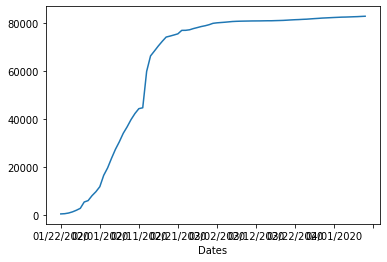

In [0]:
df['China Confirmed Cases'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data = df.filter(['China Confirmed Cases'])

In [0]:
dataset = data.values

In [0]:
training_data_len = math.ceil(len(dataset) * 0.7)
training_data_len

56

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
scaled_data

array([[0.        ],
       [0.00115382],
       [0.00451813],
       [0.01042084],
       [0.01854618],
       [0.02828688],
       [0.06025384],
       [0.06727394],
       [0.09222081],
       [0.11239449],
       [0.13776644],
       [0.19532398],
       [0.232805  ],
       [0.28127771],
       [0.32661687],
       [0.36483877],
       [0.40762738],
       [0.44046882],
       [0.47708751],
       [0.5077549 ],
       [0.53243457],
       [0.53696484],
       [0.72079917],
       [0.79929556],
       [0.82425457],
       [0.84976013],
       [0.87309164],
       [0.8946742 ],
       [0.89962956],
       [0.9051922 ],
       [0.91093703],
       [0.92856015],
       [0.92881521],
       [0.93147507],
       [0.93770571],
       [0.94270966],
       [0.94798081],
       [0.95196454],
       [0.95716281],
       [0.96415862],
       [0.9666363 ],
       [0.96815449],
       [0.96967268],
       [0.97150665],
       [0.97336491],
       [0.97433655],
       [0.97498026],
       [0.975

In [0]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.00115382, 0.00451813, 0.01042084, 0.01854618,
       0.02828688, 0.06025384, 0.06727394, 0.09222081, 0.11239449])]
[0.1377664419748588]



In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(46, 10, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
46/46 [==============================] - 1s 20ms/step - loss: 0.0480
Epoch 2/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 3/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 4/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 5/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 6/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 7/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 8/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 9/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 10/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 11/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 12/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 13/50
46/46 [===========================

In [0]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])
  

In [0]:
len(test_data)

33

In [0]:
x_test = np.array(x_test)


In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
x_test

array([[[0.97498026],
        [0.97542965],
        [0.97575758],
        [0.97617052],
        [0.97630412],
        [0.97646201],
        [0.97685067],
        [0.97716645],
        [0.97716645],
        [0.97783446]],

       [[0.97542965],
        [0.97575758],
        [0.97617052],
        [0.97630412],
        [0.97646201],
        [0.97685067],
        [0.97716645],
        [0.97716645],
        [0.97783446],
        [0.97836886]],

       [[0.97575758],
        [0.97617052],
        [0.97630412],
        [0.97646201],
        [0.97685067],
        [0.97716645],
        [0.97716645],
        [0.97783446],
        [0.97836886],
        [0.97902472]],

       [[0.97617052],
        [0.97630412],
        [0.97646201],
        [0.97685067],
        [0.97716645],
        [0.97716645],
        [0.97783446],
        [0.97836886],
        [0.97902472],
        [0.98016639]],

       [[0.97630412],
        [0.97646201],
        [0.97685067],
        [0.97716645],
        [0.97716645],
  

In [0]:
len(x_test)

23

In [0]:
len(x_train)

46

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
predictions

array([[81047.09 ],
       [81054.016],
       [81061.82 ],
       [81071.99 ],
       [81084.48 ],
       [81098.68 ],
       [81113.41 ],
       [81129.26 ],
       [81145.45 ],
       [81164.27 ],
       [81184.69 ],
       [81206.19 ],
       [81229.23 ],
       [81251.34 ],
       [81272.47 ],
       [81292.97 ],
       [81312.98 ],
       [81332.47 ],
       [81350.29 ],
       [81366.71 ],
       [81382.305],
       [81397.016],
       [81411.98 ]], dtype=float32)

In [0]:
len(predictions)

23

In [0]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse


820.9959239130435

In [0]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted Cases'] = predictions



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


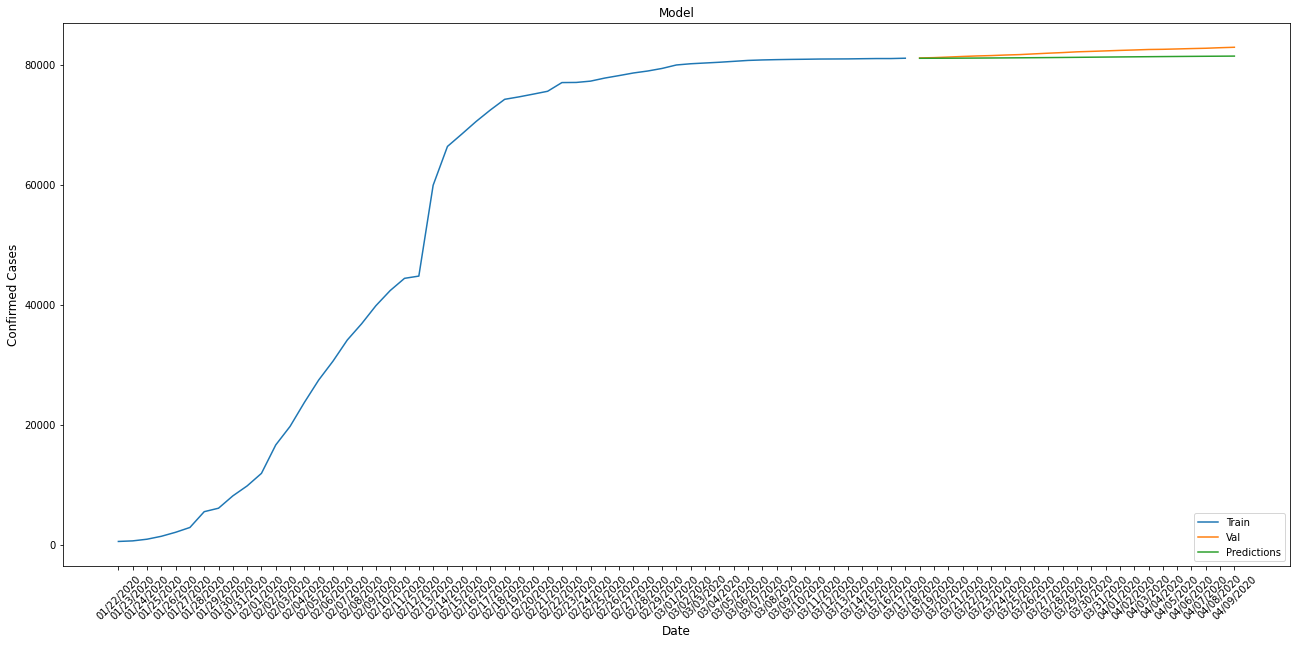

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(train['China Confirmed Cases'])
plt.plot(valid[['China Confirmed Cases', 'Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
#plt.show()

In [0]:
valid

,China Confirmed Cases,Predicted Cases
Dates,,
03/18/2020,81102,81047.093750
03/19/2020,81156,81054.015625
03/20/2020,81250,81061.820312
03/21/2020,81350,81071.992188
03/22/2020,81435,81084.476562
03/23/2020,81498,81098.679688
03/24/2020,81591,81113.406250
03/25/2020,81661,81129.257812
03/26/2020,81782,81145.453125


In [0]:
len(valid)

23

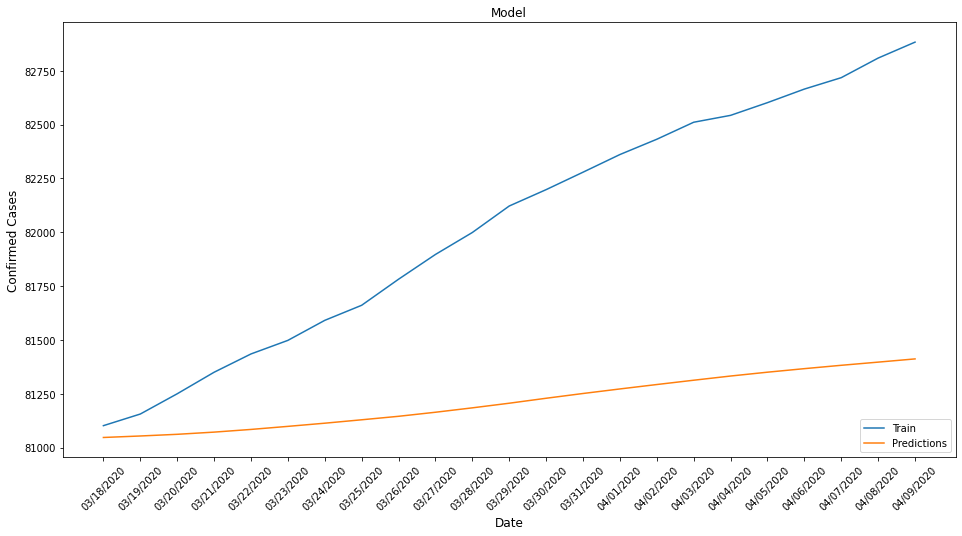

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(valid)
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
#plt.show()

In [0]:
from sklearn.metrics import r2_score
score = r2_score(valid['China Confirmed Cases'], valid['Predicted Cases'])
print(score)

-1.7906129926819845


LSTM FOR CHINA DEATHS

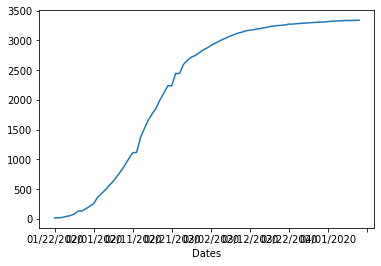

In [0]:
df2 = df['Confirmed Deaths'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data2 = df.filter(['Confirmed Deaths'])

In [0]:
dataset2 = data2.values

In [0]:
training_data_len2 = math.ceil(len(dataset2) * 0.7)
training_data_len2

56

In [0]:
scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler.fit_transform(dataset2)

In [0]:
scaled_data2

array([[0.00000000e+00],
       [3.01023480e-04],
       [2.70921132e-03],
       [7.52558700e-03],
       [1.17399157e-02],
       [1.95665262e-02],
       [3.43166767e-02],
       [3.49187237e-02],
       [4.63576159e-02],
       [5.90006020e-02],
       [7.28476821e-02],
       [1.03552077e-01],
       [1.22817580e-01],
       [1.42685129e-01],
       [1.64358820e-01],
       [1.85430464e-01],
       [2.11017459e-01],
       [2.37206502e-01],
       [2.67308850e-01],
       [2.99518362e-01],
       [3.29620710e-01],
       [3.31125828e-01],
       [4.06983745e-01],
       [4.52739314e-01],
       [4.95484648e-01],
       [5.26490066e-01],
       [5.55990367e-01],
       [5.97832631e-01],
       [6.31848284e-01],
       [6.68573149e-01],
       [6.68573149e-01],
       [7.30282962e-01],
       [7.30885009e-01],
       [7.76038531e-01],
       [7.97110175e-01],
       [8.12763396e-01],
       [8.21493076e-01],
       [8.34738110e-01],
       [8.48886213e-01],
       [8.59422035e-01],


In [0]:
train_data2 = scaled_data2[0:training_data_len2, :]
x_train2 = []
y_train2 = []

for i in range(10, len(train_data2)):
  x_train2.append(train_data2[i-10:i, 0])
  y_train2.append(train_data2[i, 0])
  if i<= 10:
    print(x_train2)
    print(y_train2)
    print()

[array([0.        , 0.00030102, 0.00270921, 0.00752559, 0.01173992,
       0.01956653, 0.03431668, 0.03491872, 0.04635762, 0.0590006 ])]
[0.0728476821192053]



In [0]:
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

In [0]:
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_train2.shape

(46, 10, 1)

In [0]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [0]:
#compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model2.fit(x_train2, y_train2, batch_size=1, epochs=50)

Epoch 1/50
46/46 [==============================] - 1s 22ms/step - loss: 0.0689
Epoch 2/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 3/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 4/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 5/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 6/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 7/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 8/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 9/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 10/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 11/50
46/46 [==============================] - 0s 8ms/step - loss: 6.2148e-04
Epoch 12/50
46/46 [==============================] - 0s 8ms/step - loss: 4.6238e-04
Epoch 13/50
46/46 [=====================

In [0]:
test_data2 = scaled_data2[training_data_len2-10: , :]
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(10, len(test_data2)):
  x_test2.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data2)

33

In [0]:
x_test2 = np.array(x_test2)

In [0]:
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

In [0]:
predictions2 = model.predict(x_test2)
predictions2 = scaler.inverse_transform(predictions2)

In [0]:
rmse = np.sqrt( np.mean( predictions2 - y_test )**2)
rmse

78769.25523310123

In [0]:
train2 = data2[:training_data_len2]
valid2 = data2[training_data_len2:]
valid2['Predicted Deaths'] = predictions2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
valid2


,Confirmed Deaths,Predicted Deaths
Dates,,
03/18/2020,3241,3246.508301
03/19/2020,3249,3249.823975
03/20/2020,3253,3252.768799
03/21/2020,3259,3255.317627
03/22/2020,3274,3257.468750
03/23/2020,3274,3259.792236
03/24/2020,3281,3261.808838
03/25/2020,3285,3263.683594
03/26/2020,3291,3265.386963


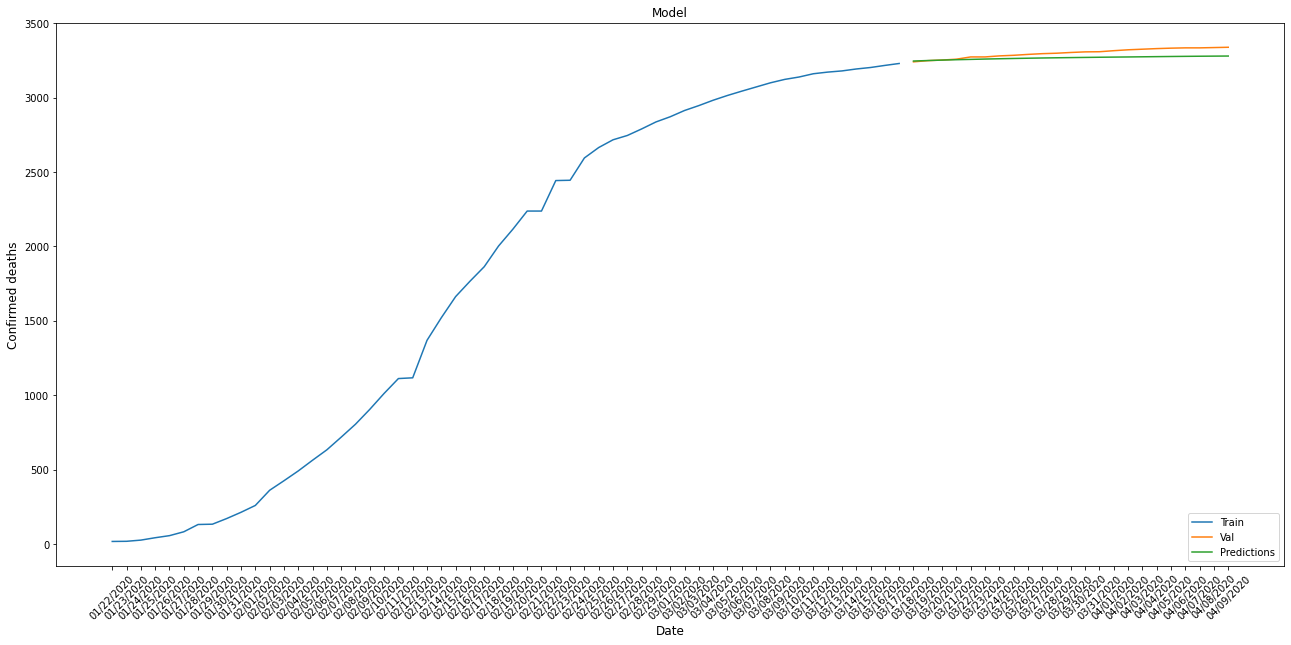

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed deaths', fontsize=12)
plt.plot(train2['Confirmed Deaths'])
plt.plot(valid2[['Confirmed Deaths', 'Predicted Deaths']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

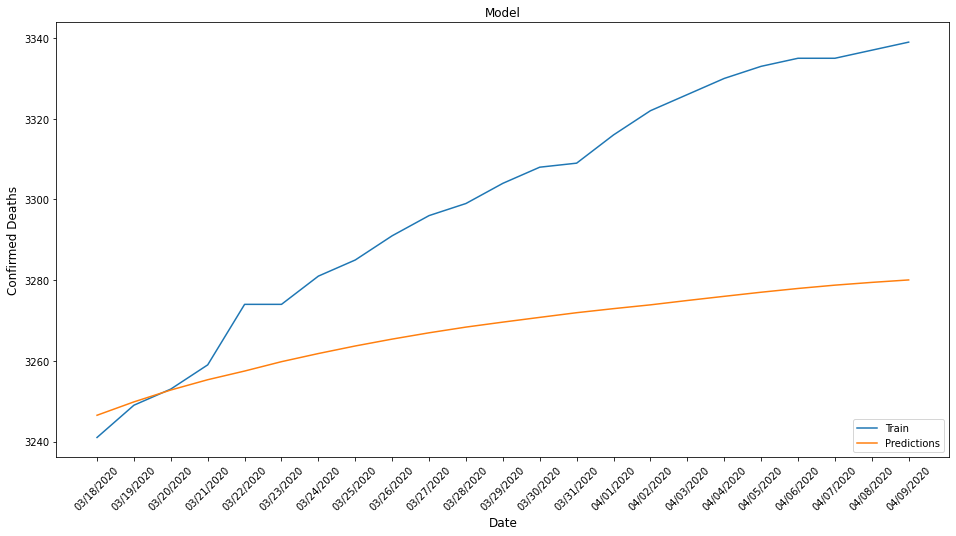

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Deaths', fontsize=12)
plt.plot(valid2)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

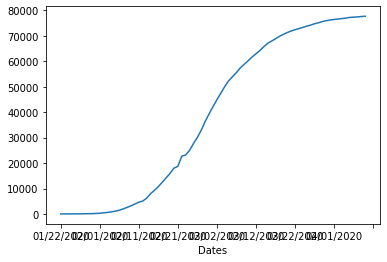

In [0]:
df2 = df['Confirmed Recovered'].plot()


In [0]:
data3 = df.filter(['Confirmed Recovered'])

In [0]:
dataset3 = data3.values

In [0]:
training_data_len3 = math.ceil(len(dataset3) * 0.7)
training_data_len3

56

In [0]:
scaler3 = MinMaxScaler(feature_range=(0,1))
scaled_data3 = scaler.fit_transform(dataset3)

In [0]:
scaled_data3

array([[0.00000000e+00],
       [2.57562684e-05],
       [1.03025074e-04],
       [1.41659476e-04],
       [2.70440819e-04],
       [3.86344026e-04],
       [9.40103798e-04],
       [1.18478835e-03],
       [1.37796036e-03],
       [2.39533296e-03],
       [3.18089915e-03],
       [5.60198838e-03],
       [7.54658665e-03],
       [1.04956794e-02],
       [1.39985319e-02],
       [1.86604165e-02],
       [2.53828025e-02],
       [3.30710487e-02],
       [4.10941263e-02],
       [5.00959421e-02],
       [5.93424425e-02],
       [6.50860903e-02],
       [7.97027727e-02],
       [1.02368289e-01],
       [1.19380304e-01],
       [1.38143746e-01],
       [1.60126721e-01],
       [1.82586187e-01],
       [2.05200191e-01],
       [2.31626122e-01],
       [2.40512035e-01],
       [2.91960181e-01],
       [2.98244710e-01],
       [3.21785940e-01],
       [3.56054655e-01],
       [3.87065202e-01],
       [4.23716372e-01],
       [4.67489150e-01],
       [5.06007650e-01],
       [5.42607307e-01],


In [0]:
train_data3 = scaled_data3[0:training_data_len2, :]
x_train3 = []
y_train3 = []

for i in range(10, len(train_data3)):
  x_train3.append(train_data3[i-10:i, 0])
  y_train3.append(train_data3[i, 0])
  if i<= 10:
    print(x_train3)
    print(y_train3)
    print()

[array([0.00000000e+00, 2.57562684e-05, 1.03025074e-04, 1.41659476e-04,
       2.70440819e-04, 3.86344026e-04, 9.40103798e-04, 1.18478835e-03,
       1.37796036e-03, 2.39533296e-03])]
[0.0031808991513309548]



In [0]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

In [0]:
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(46, 10, 1)

In [0]:
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model3.add(LSTM(50, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))

In [0]:
model3.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
46/46 [==============================] - 1s 22ms/step - loss: 0.0403
Epoch 2/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0090
Epoch 3/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 4/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0027
Epoch 5/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0021
Epoch 6/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0018
Epoch 7/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 8/50
46/46 [==============================] - 0s 9ms/step - loss: 8.7372e-04
Epoch 9/50
46/46 [==============================] - 0s 9ms/step - loss: 7.8372e-04
Epoch 10/50
46/46 [==============================] - 0s 9ms/step - loss: 3.3322e-04
Epoch 11/50
46/46 [==============================] - 0s 9ms/step - loss: 3.2044e-04
Epoch 12/50
46/46 [==============================] - 0s 9ms/step - loss: 2.3182e-04
Epoch 13/50
46/46 [====

In [0]:
test_data3 = scaled_data3[training_data_len3-10: , :]
x_test3 = []
y_test3 = dataset3[training_data_len3:, :]
for i in range(10, len(test_data3)):
  x_test3.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data3)

33

In [0]:
x_test3 = np.array(x_test3)

In [0]:
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1 ))

In [0]:
predictions3 = model.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)

In [0]:
rmse = np.sqrt( np.mean( predictions3 - y_test )**2)
rmse

6030.384510869565

In [0]:
train3 = data3[:training_data_len3]
valid3 = data3[training_data_len3:]
valid3['Predicted Recovered Cases'] = predictions3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
valid3


,Confirmed Recovered,Predicted Recovered Cases
Dates,,
03/18/2020,69755,75517.023438
03/19/2020,70535,75594.531250
03/20/2020,71266,75663.367188
03/21/2020,71857,75722.937500
03/22/2020,72362,75773.226562
03/23/2020,72814,75827.539062
03/24/2020,73280,75874.671875
03/25/2020,73773,75918.500000
03/26/2020,74181,75958.312500


In [0]:
valid_final = valid.join(valid2.join(valid3))
valid_final

,China Confirmed Cases,Predicted Cases,Confirmed Deaths,Predicted Deaths,Confirmed Recovered,Predicted Recovered Cases
Dates,,,,,,
03/18/2020,81102,81047.093750,3241,3246.508301,69755,75517.023438
03/19/2020,81156,81054.015625,3249,3249.823975,70535,75594.531250
03/20/2020,81250,81061.820312,3253,3252.768799,71266,75663.367188
03/21/2020,81350,81071.992188,3259,3255.317627,71857,75722.937500
03/22/2020,81435,81084.476562,3274,3257.468750,72362,75773.226562
03/23/2020,81498,81098.679688,3274,3259.792236,72814,75827.539062
03/24/2020,81591,81113.406250,3281,3261.808838,73280,75874.671875
03/25/2020,81661,81129.257812,3285,3263.683594,73773,75918.500000
03/26/2020,81782,81145.453125,3291,3265.386963,74181,75958.312500


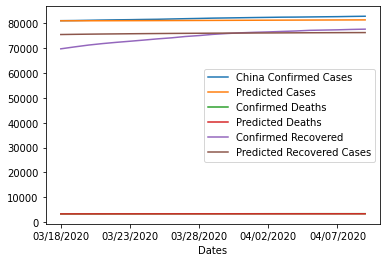

In [0]:
valid_final.plot()

In [0]:
from sklearn.metrics import *

In [0]:
score = r2_score(valid_final['China Confirmed Cases'], valid_final['Predicted Cases'])
score

-1.7906129926819845

In [0]:
score1 = r2_score(valid_final['Confirmed Deaths'], valid_final['Predicted Deaths'])
score1

-0.6142635592478123

In [0]:
score3 = r2_score(valid_final['Confirmed Recovered'], valid_final['Predicted Recovered Cases'])
score3

-0.058900409128719744

In [0]:
Average = (score + score1 + score3) / 3
Average

-0.8212589870195055